<a href="https://colab.research.google.com/github/DataDrivenAkanksha/Cryptocurrency_price_forecasting/blob/main/Cryptocurrency_price_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cryptocurrencies are fast becoming rivals to traditional currency across the world. The digital currencies are available to purchase in many different places, making it accessible to everyone, and with retailers accepting various cryptocurrencies it could be a sign that money as we know it is about to go through a major change.

In addition, the blockchain technology on which many cryptocurrencies are based, with its revolutionary distributed digital backbone, has many other promising applications. Implementations of secure, decentralized systems can aid us in conquering organizational issues of trust and security that have plagued our society throughout the ages. In effect, we can fundamentally disrupt industries core to economies, businesses and social structures, eliminating inefficiency and human error.

Content
The dataset contains all historical daily prices (open, high, low, close) for all cryptocurrencies listed on CoinMarketCap.

# Connecting with the kaggle and importing the data

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Loading the data from kaggle
!kaggle datasets download -d taniaj/cryptocurrency-market-history-coinmarketcap

Dataset URL: https://www.kaggle.com/datasets/taniaj/cryptocurrency-market-history-coinmarketcap
License(s): CC0-1.0
  0% 0.00/13.4M [00:00<?, ?B/s]
100% 13.4M/13.4M [00:00<00:00, 1.24GB/s]


In [4]:
# unzipping the data
!unzip cryptocurrency-market-history-coinmarketcap.zip

Archive:  cryptocurrency-market-history-coinmarketcap.zip
  inflating: all_currencies.csv      


In [5]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('all_currencies.csv')

In [7]:
df.head(5)

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.head(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN


In [10]:
df.tail(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
632213,2018-09-23,ZZC,0.067149,0.067324,0.024069,0.024161,34.0,130705.0
632214,2018-09-24,ZZC,0.024167,0.091875,0.024121,0.091631,58.0,47041.0
632215,2018-09-25,ZZC,0.091528,0.091568,0.057507,0.090547,752.0,178158.0
632216,2018-09-26,ZZC,0.090400,0.104745,0.086071,0.086559,60.0,175963.0
632217,2018-09-27,ZZC,0.086664,0.130541,0.067363,0.073475,91.0,168691.0


In [11]:
df.sample(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
8740,2015-11-25,8BIT,0.011826,0.012398,0.011822,0.012173,135.0,3671.0
174307,2016-10-14,DOPE,0.000287,0.000308,0.000230,0.000237,159.0,40449.0
433196,2014-06-14,Q2C,0.000177,0.000179,0.000081,0.000083,201.0,42189.0
549422,2015-12-13,USNBT,1.010000,1.020000,0.993119,0.993314,55813.0,846674.0
249527,2017-06-17,GOLOS,0.106149,0.122307,0.103207,0.117232,40222.0,13119900.0


In [12]:
df['Symbol'].value_counts()

,count
Symbol,
BTC,1979
NMC,1979
LTC,1979
NVC,1978
PPC,1978
...,...
MNP,2
PHON,2
DACH,2


#Extracting the bitcoin data only

In [13]:
btc_df = df[df['Symbol'] == 'BTC']

In [14]:
btc_df.sample(5)

,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
90360,2018-02-26,BTC,9669.43,10475.00,9501.73,10366.70,7.287690e+09,1.632834e+11
88650,2013-06-22,BTC,109.50,109.96,107.51,108.30,NaN,1.239210e+09
88599,2013-05-02,BTC,116.38,125.60,92.28,105.21,NaN,1.292190e+09
89910,2016-12-03,BTC,778.25,778.25,764.86,771.16,6.954730e+07,1.246780e+10
90260,2017-11-18,BTC,7697.21,7884.99,7463.44,7790.15,3.667190e+09,1.284249e+11


In [15]:
btc_df.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap'],
      dtype='object')

In [16]:
# dropping the volume and market cap columns
btc_df.drop(['Volume', 'Market Cap'], axis=1, inplace=True)

In [17]:
btc_df.sample(5)

,Date,Symbol,Open,High,Low,Close
88954,2014-04-22,BTC,495.45,503.22,487.58,487.92
88644,2013-06-16,BTC,99.80,101.60,98.95,99.51
90046,2017-04-18,BTC,1193.77,1217.57,1193.77,1211.67
88625,2013-05-28,BTC,129.77,130.58,125.60,129.00
89230,2015-01-23,BTC,233.52,234.85,225.20,232.88


In [18]:
btc_df.shape

(1979, 6)

In [19]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1979 entries, 88595 to 90573
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1979 non-null   object 
 1   Symbol  1979 non-null   object 
 2   Open    1979 non-null   float64
 3   High    1979 non-null   float64
 4   Low     1979 non-null   float64
 5   Close   1979 non-null   float64
dtypes: float64(4), object(2)
memory usage: 108.2+ KB


In [20]:
btc_df.isna().sum()

,0
Date,0
Symbol,0
Open,0
High,0
Low,0
Close,0


In [21]:
btc_df.duplicated().sum()

np.int64(0)

In [22]:
btc_df.Date = pd.to_datetime(btc_df.Date)

In [23]:
btc_df = btc_df.set_index('Date')

In [24]:
btc_df.sample(5)

,Symbol,Open,High,Low,Close
Date,,,,,
2018-06-22,BTC,6737.88,6747.08,6006.60,6083.69
2014-06-07,BTC,653.52,656.94,644.91,654.97
2016-03-29,BTC,424.30,426.20,412.68,416.52
2013-08-19,BTC,113.38,123.06,111.77,119.00
2015-10-29,BTC,304.32,318.17,301.82,313.86


In [25]:
btc_df.describe()

,Open,High,Low,Close
count,1979.000000,1979.000000,1979.000000,1979.000000
mean,2165.487388,2234.527827,2088.606306,2168.580111
std,3422.262088,3552.409881,3264.080028,3423.188587
min,68.500000,74.560000,65.530000,68.430000
25%,311.045000,317.005000,295.315000,311.240000
50%,585.950000,594.460000,574.600000,586.670000
75%,1958.430000,2071.750000,1873.040000,1993.285000
max,19475.800000,20089.000000,18974.100000,19497.400000


<Axes: title={'center': 'BTC Price chart'}, xlabel='Date'>

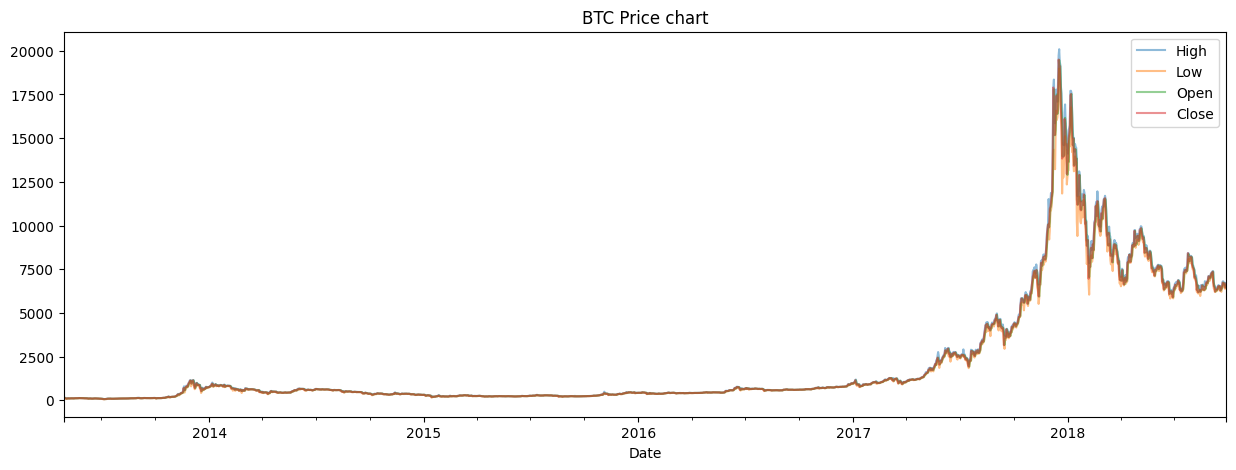

In [26]:
btc_df[['High','Low','Open','Close']].plot(figsize=(15,5),alpha=0.5,title='BTC Price chart')

#alpha controls the transparency of the lines in the plot. It ranges from:
# 0.0 → completely transparent (invisible)
# 1.0 → completely opaque (default)
# Each of the lines (High, Low, Open, Close) will be drawn at 50% transparency. This is useful when plotting multiple overlapping lines, so you can still see everything clearly
# and the plot doesn’t look cluttered.

The four had almost same behaviour throught time and nased on this assumption in this project we will only focus on one of them in order to build a model which could predict fututre values and then as possible suggestions extrapolate such model to other indicators. First we check the stationary and seasonality in the data.

#Stationary check and seasonal decomposition


If a timeseries is a stationary then it implies mean and variance are constant in time. This is a important step in timeseries analysis.
Seasonal decomposition is a method in statsmodel to decompose time series in the 4 components such as stationary, Trend, seasonal and residual.

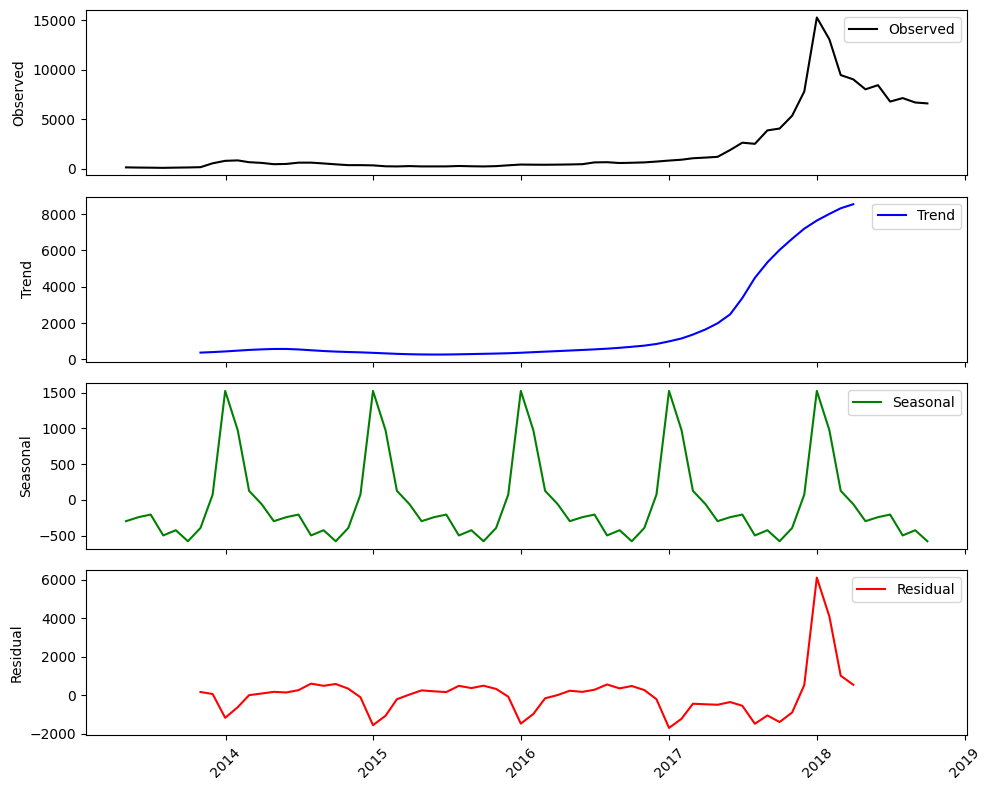

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose


from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensure the DataFrame is sorted by date
btc_df = btc_df.sort_index()

# Resample to monthly Close prices and drop missing values
monthly_close = btc_df['Close'].resample('M').mean().dropna()

# Perform seasonal decomposition
result = seasonal_decompose(monthly_close, model='additive', period=12)

# Plot full decomposition (trend, seasonal, residual)
# Original data
# Manually plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

axes[0].plot(monthly_close, label='Observed', color='black')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(result.trend, label='Trend', color='blue')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal
axes[2].plot(result.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual
axes[3].plot(result.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

# Rotate x-axis ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
print(type(result))

<class 'statsmodels.tsa.seasonal.DecomposeResult'>


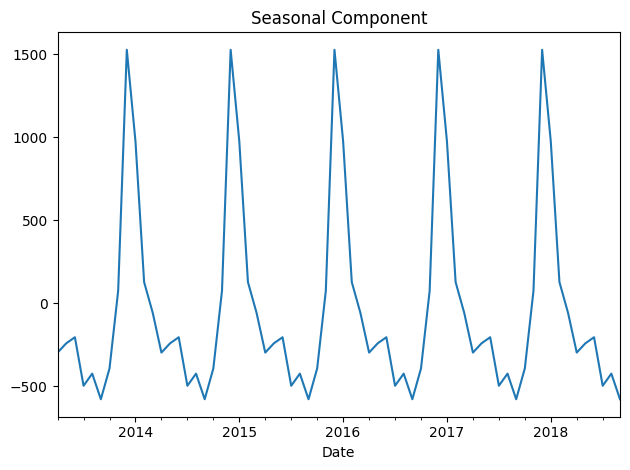

In [29]:
# Plot only the seasonal component
result.seasonal.plot(title='Seasonal Component')
plt.tight_layout()
plt.show()

The seasonal commponent repeat after each year on a yearly basis. "There’s a repeating seasonal pattern every 12 periods.”

In [30]:
from statsmodels.tsa.stattools import adfuller


# Run ADF test on 'Close' prices
result = adfuller(monthly_close)

# Print results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -1.147333301926855
p-value: 0.6958317999669209
Critical Values:
   1%: -3.5352168748293127
   5%: -2.9071540828402367
   10%: -2.5911025443786984


| Output              | Interpretation                                                                                                                                |
| ------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **ADF Statistic**   | The test statistic. Should be **less than** the critical value to reject the null hypothesis (i.e., detect stationarity).                     |
| **p-value**         | If **< 0.05**, the series is likely **stationary** (no unit root).                                                                            |
| **Critical Values** | Benchmarks at 1%, 5%, and 10% confidence levels. If ADF stat is **less than** these values, the null hypothesis (non-stationary) is rejected. |


📉 Interpretation
❌ The series is not stationary.

Why?

p-value = 0.6958 → much higher than 0.05 → fail to reject the null hypothesis (that the series has a unit root).

ADF Statistic = -1.1473, which is greater than all the critical values (1%, 5%, 10%).

So the test suggests monthly BTC Close prices are non-stationary — which is very common for financial time series (they usually have trends or seasonality).

# Treating the non stationary : Applying the transformations


##a. Differencing (This is the most common method. It subtract the previous value from the current value.)

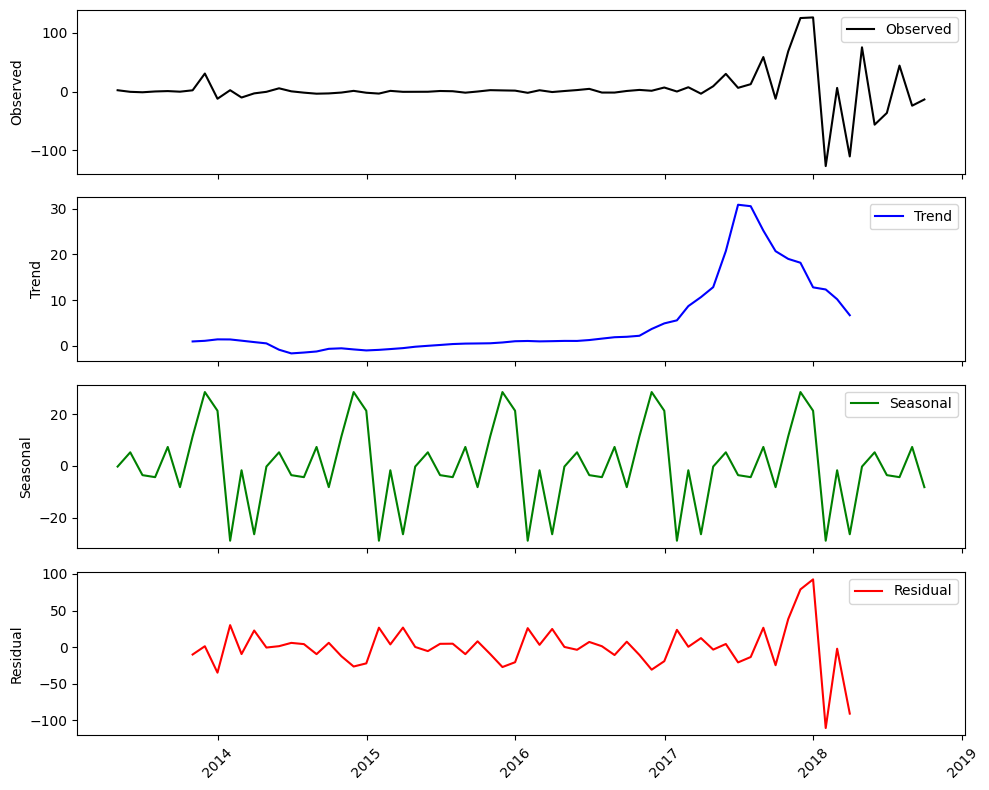

In [31]:
# 1st Differencing
btc_df['Close_1diff'] = btc_df['Close'].diff()
# Resample to monthly Close prices and drop missing values
monthly_close_1diff = btc_df['Close_1diff'].resample('M').mean().dropna()

# Perform seasonal decomposition
result_1diff = seasonal_decompose(monthly_close_1diff, model='additive', period=12)

# Plot full decomposition (trend, seasonal, residual)
# Plot full decomposition (trend, seasonal, residual)
# Manually plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Original data
axes[0].plot(monthly_close_1diff, label='Observed', color='black')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(result_1diff.trend, label='Trend', color='blue')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal
axes[2].plot(result_1diff.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual
axes[3].plot(result_1diff.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

# Rotate x-axis ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Run ADF test on 'Close' prices
result_1diff = adfuller(monthly_close_1diff)

# Print results
print('ADF Statistic:', result_1diff[0])
print('p-value:', result_1diff[1])
print('Critical Values:')
for key, value in result_1diff[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -8.65648301700731
p-value: 4.9530814628822866e-14
Critical Values:
   1%: -3.5352168748293127
   5%: -2.9071540828402367
   10%: -2.5911025443786984


📉 Interpretation: The series is now stationary.

Why?

p-value = 4.95e-14 → This is far below the typical significance level of 0.05, allowing us to reject the null hypothesis that the series has a unit root (i.e., is nonstationary).

ADF Statistic = -8.656 → This value is less than all critical values at the 1%, 5%, and 10% levels, further confirming stationarity.

Conclusion:
Based on the Augmented Dickey-Fuller (ADF) test, the monthly BTC Close prices have been successfully transformed into a stationary series.

##b. Log transformation (Use if variance increases with the mean.)

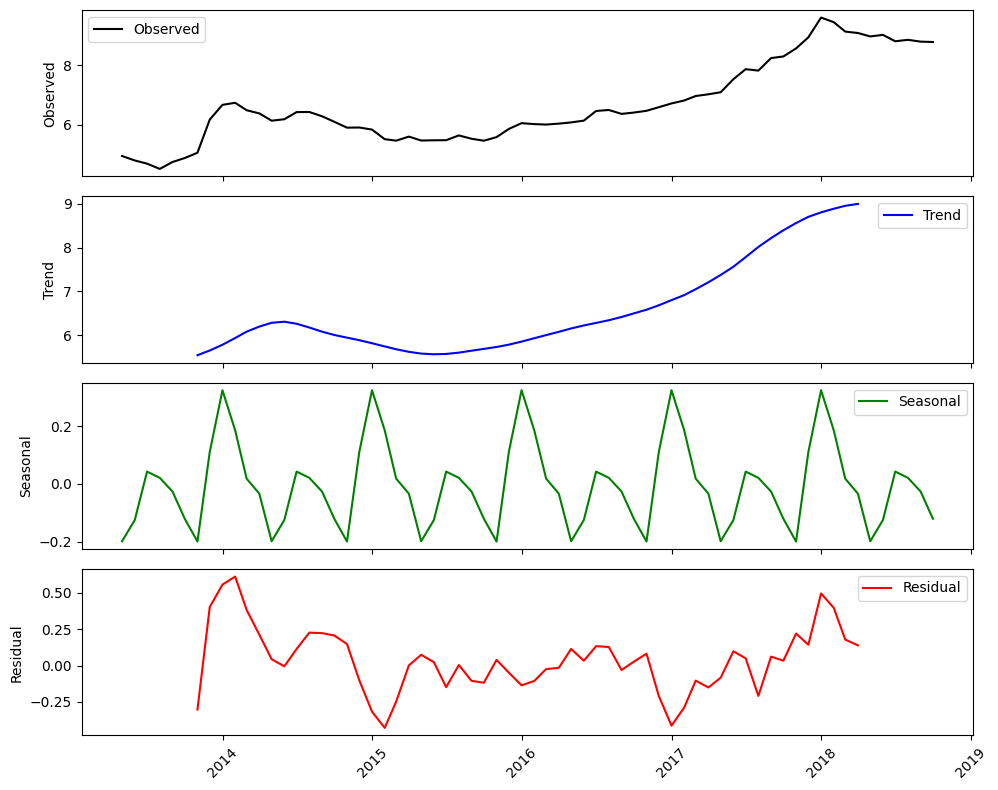

In [33]:
# log transformation
btc_df['Close_log'] = np.log(btc_df['Close'])
# Resample to monthly Close prices and drop missing values
monthly_close_log = btc_df['Close_log'].resample('M').mean().dropna()

# Perform seasonal decomposition
result_log = seasonal_decompose(monthly_close_log, model='additive', period=12)

# Plot full decomposition (trend, seasonal, residual)
# Manually plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Original data
axes[0].plot(monthly_close_log, label='Observed', color='black')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(result_log.trend, label='Trend', color='blue')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal
axes[2].plot(result_log.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual
axes[3].plot(result_log.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

# Rotate x-axis ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [34]:
# Run ADF test on 'Close' prices
result_log = adfuller(monthly_close_log)

# Print results
print('ADF Statistic:', result_log[0])
print('p-value:', result_log[1])
print('Critical Values:')
for key, value in result_log[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.021639000106049
p-value: 0.7452903881155073
Critical Values:
   1%: -3.53692771987915
   5%: -2.907887369384766
   10%: -2.591493291015625


📉 Interpretation
❌ The series is still not stationary after the log transformation.

Why?

p-value = 0.745 → much higher than 0.05 → fail to reject the null hypothesis (that the series has a unit root).

ADF Statistic = -1.021, which is greater than all the critical values (1%, 5%, 10%).

So the test suggests monthly BTC Close prices are non-stationary — which is very common for financial time series (they usually have trends or seasonality).

##c. Detrending (Remove a linear or polynomial trend using regression.)

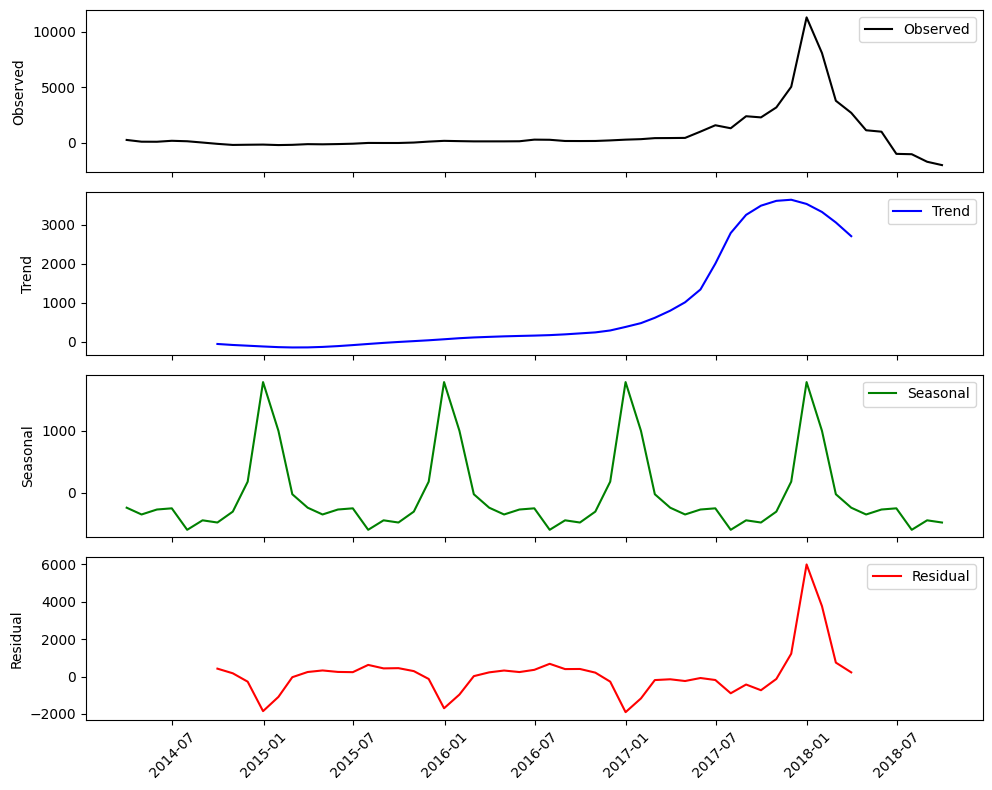

In [35]:
# Detrending

# Step 1: Resample to monthly average Close prices
monthly_close = btc_df['Close'].resample('M').mean()

# Step 2: Detrend by subtracting 12-month rolling mean
monthly_close_detrend = monthly_close - monthly_close.rolling(window=12).mean()

# Step 3: Drop missing values caused by rolling mean
monthly_close_detrend = monthly_close_detrend.dropna()

# Step 4: Perform seasonal decomposition
result_detrend = seasonal_decompose(monthly_close_detrend, model='additive', period=12)

# Step 5: Manually plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Original data
axes[0].plot(monthly_close_detrend, label='Observed', color='black')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(result_detrend.trend, label='Trend', color='blue')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal
axes[2].plot(result_detrend.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual
axes[3].plot(result_detrend.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

# Rotate x-axis ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [36]:
# Run ADF test on 'Close' prices
result_detrend = adfuller(monthly_close_detrend)

# Print results
print('ADF Statistic:', result_detrend[0])
print('p-value:', result_detrend[1])
print('Critical Values:')
for key, value in result_detrend[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -2.5758709418583763
p-value: 0.09808750067861227
Critical Values:
   1%: -3.560242358792829
   5%: -2.9178502070837
   10%: -2.5967964150943397


📉 Interpretation ❌ The series is still not stationary after the detrending.

Why?

p-value = 0.098 → much higher than 0.05 → fail to reject the null hypothesis (that the series has a unit root).

ADF Statistic = -2.57, which is greater than all the critical values (1%, 5%, 10%).

So the test suggests monthly BTC Close prices are non-stationary — which is very common for financial time series (they usually have trends or seasonality).

#d. Seasonal Differencing (If there's seasonality (e.g., quarterly, monthly), subtract the value from the same season in the previous cycle:)

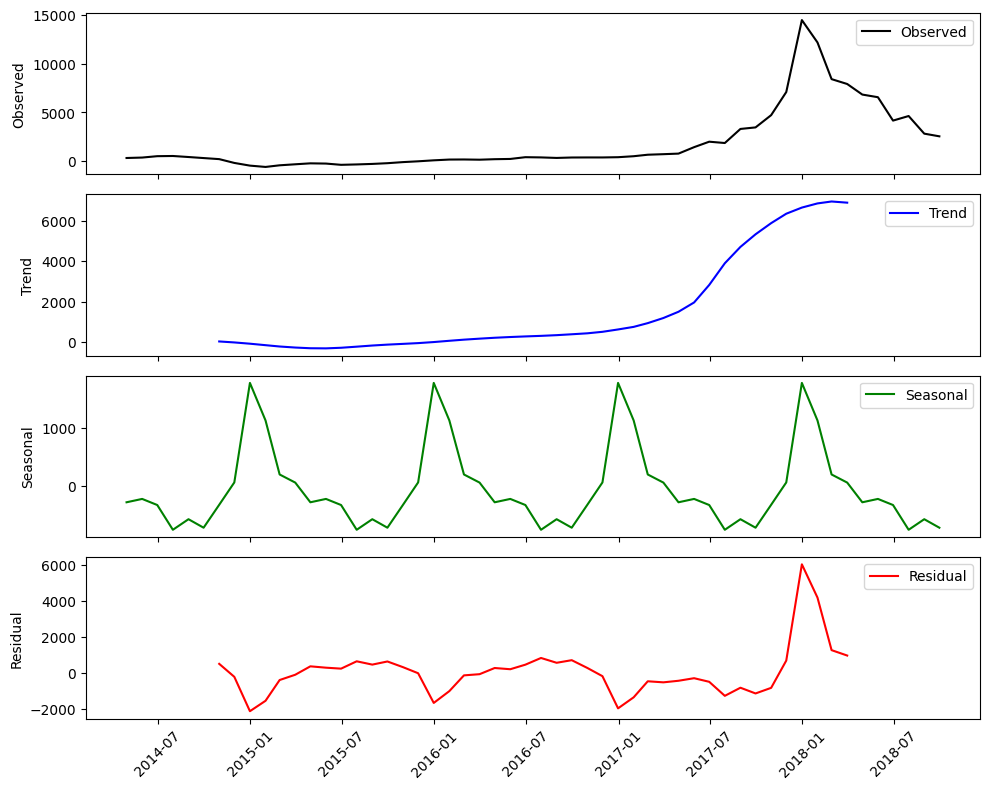

In [37]:
# Seasonal differencing
# Step 1: Resample to monthly average Close prices
monthly_close = btc_df['Close'].resample('M').mean()

# Step 2: Apply seasonal differencing (lag = 12 months)
monthly_close_seasonal_diff = monthly_close.diff(periods=12).dropna()

# Step 3: Perform seasonal decomposition
result_seasonal = seasonal_decompose(monthly_close_seasonal_diff, model='additive', period=12)


# Step 4: Manually plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Original data
axes[0].plot(monthly_close_seasonal_diff, label='Observed', color='black')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(result_seasonal.trend, label='Trend', color='blue')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal
axes[2].plot(result_seasonal.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual
axes[3].plot(result_seasonal.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

# Rotate x-axis ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
# Run ADF test on 'Close' prices
result_seasonal = adfuller(monthly_close_seasonal_diff)

# Print results
print('ADF Statistic:', result_seasonal[0])
print('p-value:', result_seasonal[1])
print('Critical Values:')
for key, value in result_seasonal[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.5350997966836266
p-value: 0.5160820776769953
Critical Values:
   1%: -3.560242358792829
   5%: -2.9178502070837
   10%: -2.5967964150943397


📉 Interpretation ❌ The series is still not stationary after the detrending.

Why?

p-value = 0.516 → much higher than 0.05 → fail to reject the null hypothesis (that the series has a unit root).

ADF Statistic = -1.53, which is greater than all the critical values (1%, 5%, 10%).

So the test suggests monthly BTC Close prices are non-stationary — which is very common for financial time series (they usually have trends or seasonality).

# Combining methods
#e. Log+Differencing

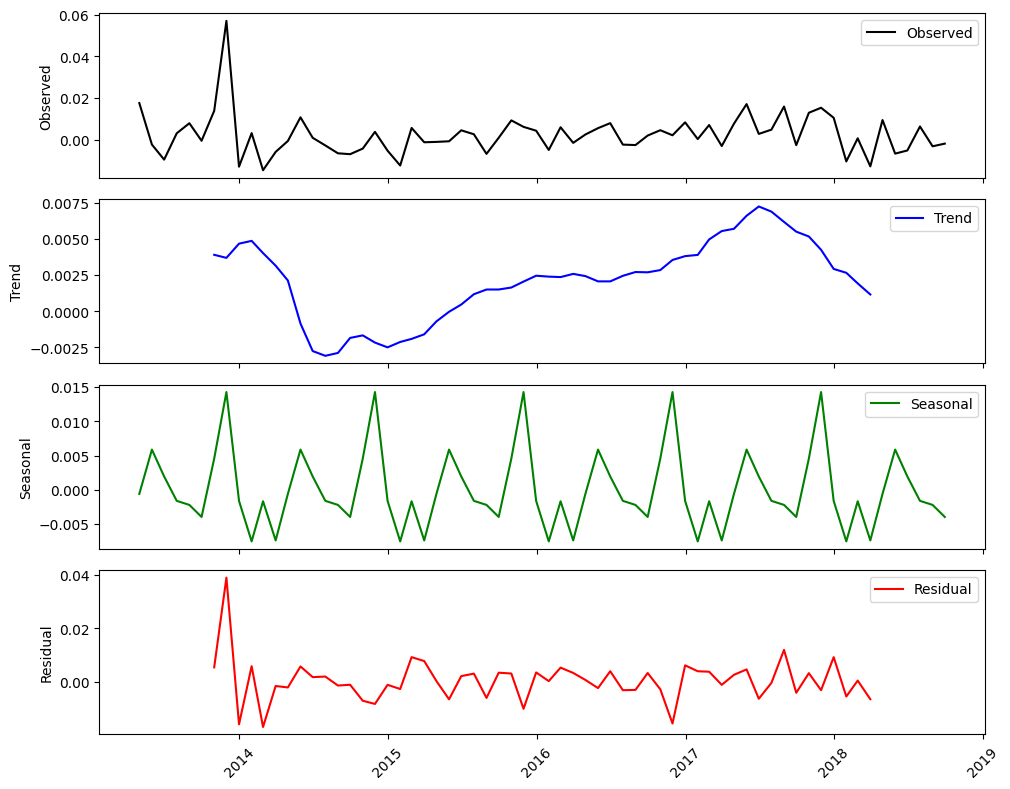

In [39]:
# Step 1: Log transform the Close prices (make sure values are all positive)
btc_df['Close_log'] = np.log(btc_df['Close'])

# Step 2: First difference the log-transformed data
btc_df['Close_log_diff'] = btc_df['Close_log'].diff()

# Step 3: Resample to monthly frequency and drop NaNs
monthly_close_log_diff = btc_df['Close_log_diff'].resample('M').mean().dropna()

# Step 4: Seasonal decomposition
result_log_diff = seasonal_decompose(monthly_close_log_diff, model='additive', period=12)


# Step 5: Manually plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Original data
axes[0].plot(monthly_close_log_diff, label='Observed', color='black')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(result_log_diff.trend, label='Trend', color='blue')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal
axes[2].plot(result_log_diff.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual
axes[3].plot(result_log_diff.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

# Rotate x-axis ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Run ADF test on 'Close' prices
result_log_diff = adfuller(monthly_close_log_diff)

# Print results
print('ADF Statistic:', result_log_diff[0])
print('p-value:', result_log_diff[1])
print('Critical Values:')
for key, value in result_log_diff[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -8.023748187590373
p-value: 2.04339480156556e-12
Critical Values:
   1%: -3.5352168748293127
   5%: -2.9071540828402367
   10%: -2.5911025443786984


📉 Interpretation: The series is now stationary.

Why?

p-value = 2e-12 → This is far below the typical significance level of 0.05, allowing us to reject the null hypothesis that the series has a unit root (i.e., is nonstationary).

ADF Statistic = -8.02 → This value is less than all critical values at the 1%, 5%, and 10% levels, further confirming stationarity.

Conclusion:
Based on the Augmented Dickey-Fuller (ADF) test, the monthly BTC Close prices have been successfully transformed into a stationary series.

# Combining methods
#f. Seasonal Differencing + Detrending

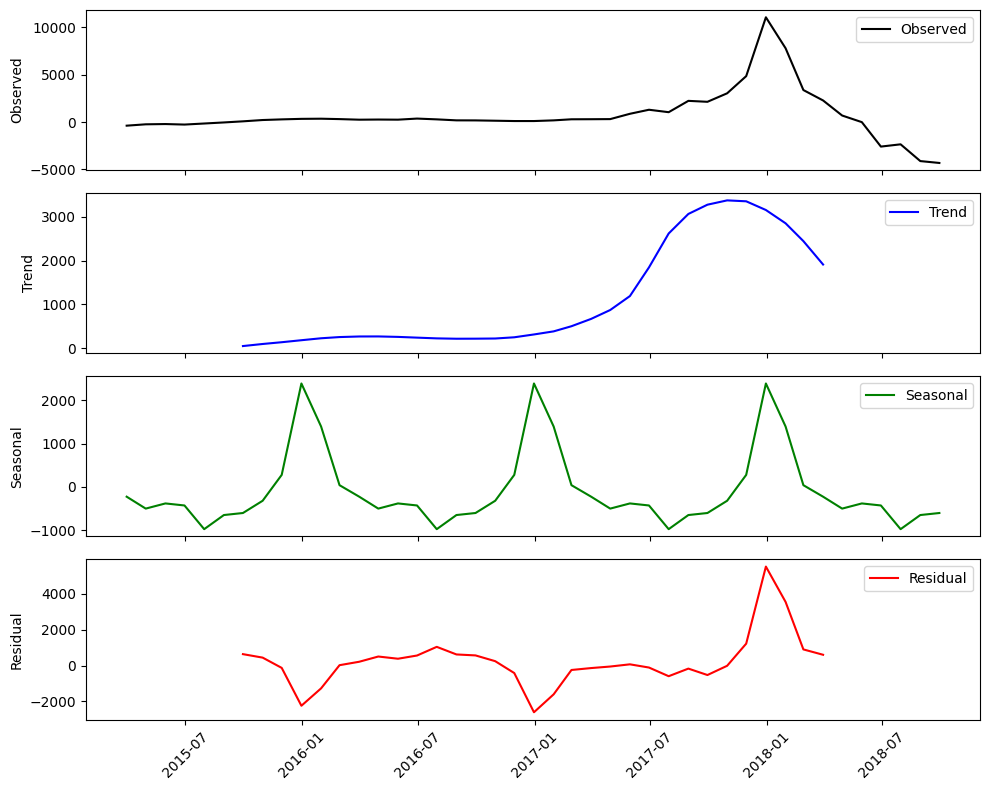

In [41]:
# Detrending

# Step 1: Resample to monthly average Close prices
monthly_close = btc_df['Close'].resample('M').mean()

# Step 2: Apply seasonal differencing (lag = 12 months)
monthly_close_seasonal_diff = monthly_close.diff(periods=12)

# Step 3: Detrend by subtracting 12-month rolling mean
monthly_close_seasonal_detrend = monthly_close_seasonal_diff - monthly_close_seasonal_diff.rolling(window=12).mean()

# Step 4: Drop missing values caused by rolling mean and differencing
monthly_close_seasonal_detrend = monthly_close_seasonal_detrend.dropna()

# Step 5: Perform seasonal decomposition
result_seasonaldiff_detrend = seasonal_decompose(monthly_close_seasonal_detrend, model='additive', period=12)

# Step 6: Plot decomposition
import matplotlib.pyplot as plt

# Step 6: Manually plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Original data
axes[0].plot(monthly_close_seasonal_detrend, label='Observed', color='black')
axes[0].set_ylabel('Observed')
axes[0].legend()

# Trend
axes[1].plot(result_seasonaldiff_detrend.trend, label='Trend', color='blue')
axes[1].set_ylabel('Trend')
axes[1].legend()

# Seasonal
axes[2].plot(result_seasonaldiff_detrend.seasonal, label='Seasonal', color='green')
axes[2].set_ylabel('Seasonal')
axes[2].legend()

# Residual
axes[3].plot(result_seasonaldiff_detrend.resid, label='Residual', color='red')
axes[3].set_ylabel('Residual')
axes[3].legend()

# Rotate x-axis ticks
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [42]:
# Run ADF test on 'Close' prices
result_seasonaldiff_detrend = adfuller(monthly_close_seasonal_detrend)

# Print results
print('ADF Statistic:', result_seasonaldiff_detrend[0])
print('p-value:', result_seasonaldiff_detrend[1])
print('Critical Values:')
for key, value in result_seasonaldiff_detrend[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.9872401211623612
p-value: 0.2921957336843738
Critical Values:
   1%: -3.60098336718852
   5%: -2.9351348158036012
   10%: -2.6059629803688282


📉 Interpretation ❌ The series is still not stationary after the detrending.

Why?

p-value = 0.292 → much higher than 0.05 → fail to reject the null hypothesis (that the series has a unit root).

ADF Statistic = -1.987, which is greater than all the critical values (1%, 5%, 10%).

So the test suggests monthly BTC Close prices are non-stationary — which is very common for financial time series (they usually have trends or seasonality).

#Autocorrelation factor(ACF) and partial autocorrelation factor(PACF)

The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are essential tools for identifying ARIMA model parameters (p and q) and checking for autocorrelation in time series.
----
| Plot                                        | Meaning                                                                                             | Helps Identify   |
| ------------------------------------------- | --------------------------------------------------------------------------------------------------- | ---------------- |
| **ACF (Autocorrelation Function)**          | Shows correlation between a series and its lagged values (e.g., value vs. value one month ago)      | **MA (q)** terms |
| **PACF (Partial Autocorrelation Function)** | Shows correlation between a series and its lagged values *after removing* intermediate correlations | **AR (p)** terms |

-----
If ACF decays slowly → series is non-stationary → need differencing (d > 0).

If ACF cuts off after lag q → indicates an MA(q) process.

If PACF cuts off after lag p → indicates an AR(p) process.

If both die off quickly → series is likely white noise.

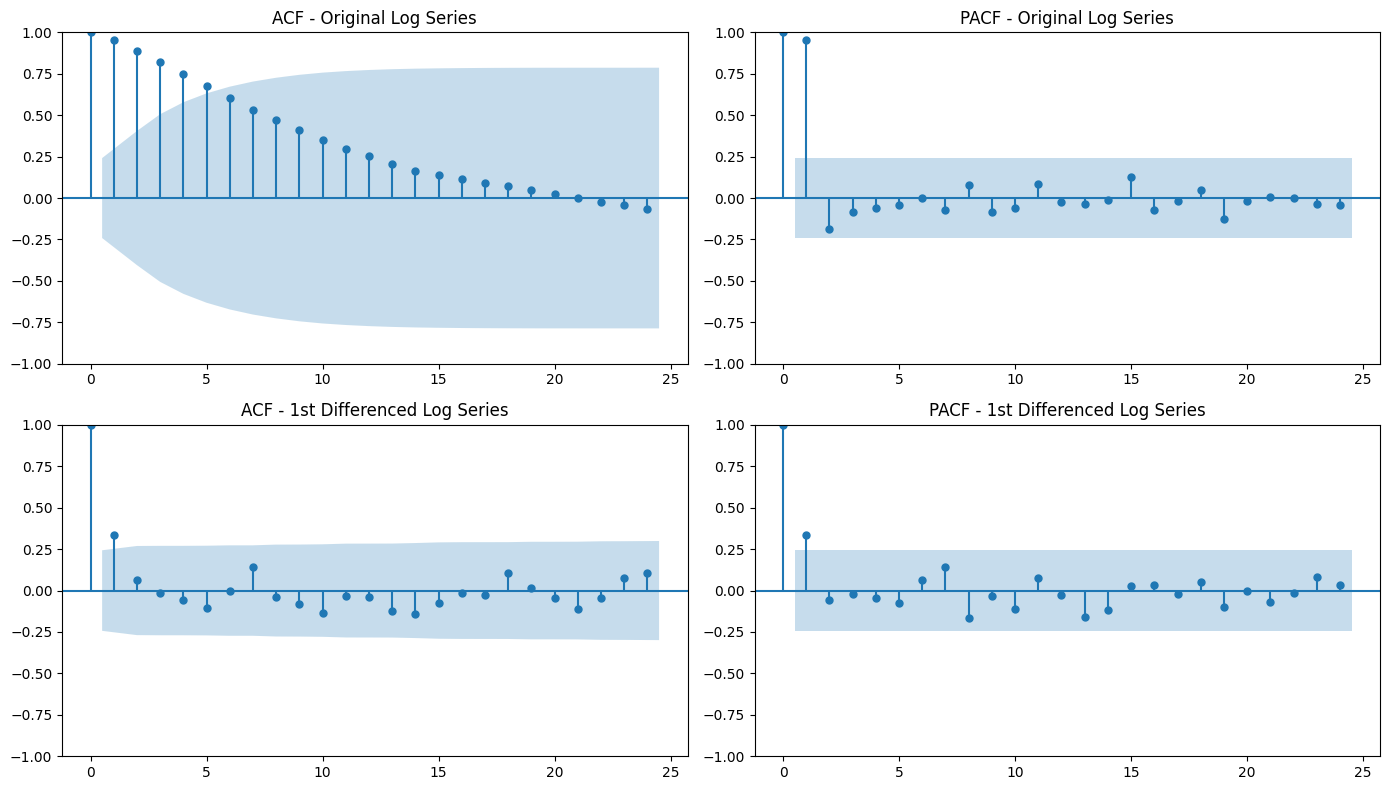

In [49]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Example: using your transformed series
# Original Close (monthly resampled)
monthly_close = btc_df['Close'].resample('M').mean().dropna()

# Log transform
monthly_close_log = np.log(monthly_close)

# First difference (to remove trend)
monthly_close_log_diff = monthly_close_log.diff().dropna()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# --- Original Series ---
plot_acf(monthly_close_log.dropna(), lags=24, ax=axes[0,0])
axes[0,0].set_title('ACF - Original Log Series')

plot_pacf(monthly_close_log.dropna(), lags=24, ax=axes[0,1], method='ywm')
axes[0,1].set_title('PACF - Original Log Series')

# --- Differenced Series ---
plot_acf(monthly_close_log_diff, lags=24, ax=axes[1,0])
axes[1,0].set_title('ACF - 1st Differenced Log Series')

plot_pacf(monthly_close_log_diff, lags=24, ax=axes[1,1], method='ywm')
axes[1,1].set_title('PACF - 1st Differenced Log Series')

plt.tight_layout()
plt.show()


Each plot has:

Blue shaded area = 95% confidence interval

Vertical bars = correlation strength at each lag

➡️ If a bar extends beyond the blue area → significant autocorrelation (not random noise).



| Pattern in ACF / PACF                                | Interpretation                      | Possible Model                  |
| ---------------------------------------------------- | ----------------------------------- | ------------------------------- |
| **Slow decay in ACF**                                | Non-stationary (trend not removed)  | Apply differencing (`d=1`)      |
| **ACF cuts off after lag *q*** and PACF tails off    | MA(q) process                       | Moving Average model            |
| **PACF cuts off after lag *p*** and ACF tails off    | AR(p) process                       | Autoregressive model            |
| **Both decay quickly (within bounds)**               | White noise (no autocorrelation)    | No AR or MA terms needed        |
| **Repeating spikes at seasonal lags (12, 24, etc.)** | Seasonality (annual, monthly, etc.) | Add seasonal terms (P, D, Q, m) |



📉 Interpretation

After applying a log transformation and first differencing to the monthly Bitcoin closing prices:

Case 1 (ACF cuts off at lag 1, PACF tails off):
This pattern indicates a Moving Average process of order 1, or MA(1) model.
In this case, the current value depends primarily on the most recent error term.

Case 2 (PACF cuts off at lag 1, ACF tails off):
This pattern indicates an Autoregressive process of order 1, or AR(1) model.
Here, the current value depends mainly on the previous value of the series.

Seasonality:
No significant repeating spikes are observed at seasonal lags (12, 24, etc.),
suggesting that no strong seasonal pattern exists in the differenced log data.


# ARIMA Forecast

Let's run auto_arima() function to get p,d,q,P,D,Q values

In [44]:
#pip uninstall -y numpy pmdarima


In [45]:
'''
!pip install numpy==1.26.4
!pip install pmdarima==2.0.4
'''


'\n!pip install numpy==1.26.4\n!pip install pmdarima==2.0.4\n'

In [46]:
#import os
#os.kill(os.getpid(), 9)


In [47]:
'''
from pmdarima import auto_arima

# Example using a cleaned and transformed monthly series
model = auto_arima(
    monthly_close_log_diff,  # your time series here
    seasonal=True,
    m=12,                # monthly seasonality
    max_p=7,
    max_d=5,
    max_q=7,
    max_P=4,
    max_D=4,
    max_Q=4,
    trace=True,          # optional: prints the steps it's taking
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True        # use faster stepwise search
)

# View model summary
print(model.summary())
'''

"\nfrom pmdarima import auto_arima\n\n# Example using a cleaned and transformed monthly series\nmodel = auto_arima(\n    monthly_close_log_diff,  # your time series here\n    seasonal=True,\n    m=12,                # monthly seasonality\n    max_p=7,\n    max_d=5,\n    max_q=7,\n    max_P=4,\n    max_D=4,\n    max_Q=4,\n    trace=True,          # optional: prints the steps it's taking\n    error_action='ignore',\n    suppress_warnings=True,\n    stepwise=True        # use faster stepwise search\n)\n\n# View model summary\nprint(model.summary())\n"

```
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-404.272, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-415.748, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-412.010, Time=0.16 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-411.973, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-414.655, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-413.989, Time=0.10 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-413.958, Time=0.18 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-413.750, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-413.750, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-411.750, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.584 seconds
                               SARIMAX Results                                
==============================================================================

Dep. Variable:                      y   No. Observations:                   66
Model:                        SARIMAX   Log Likelihood                 209.874
Date:                Thu, 23 Oct 2025   AIC                           -415.748
Time:                        07:35:27   BIC                           -411.368
Sample:                    04-30-2013   HQIC                          -414.017
                         - 09-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

intercept      0.0022      0.002      1.359      0.174      -0.001       0.005
sigma2         0.0001   8.99e-06     11.259      0.000    8.36e-05       0.000

===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               403.55
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                             2.34
Prob(H) (two-sided):                  0.01   Kurtosis:                        14.17

===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
```


The stepwise search tested multiple ARIMA models with seasonal terms (monthly period = 12).

The simplest model — ARIMA(0,0,0)(0,0,0)[12] with just an intercept — gave the lowest AIC (-415.748).

This means the transformed BTC series is stationary and mostly random noise around a small mean.

No autoregressive or moving average structure significantly improved the fit.

However, the residuals show high kurtosis and skewness, indicating potential non-normality or volatility effects.